In [58]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower
import statsmodels.api as sm
from scipy import stats
import statsmodels.formula.api as smf
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
import dame_flame
import seaborn as sns


warnings.filterwarnings("ignore")

pd.set_option("mode.copy_on_write", True)

In [59]:
insurance = pd.read_csv("insurance_data_cleaned.csv")

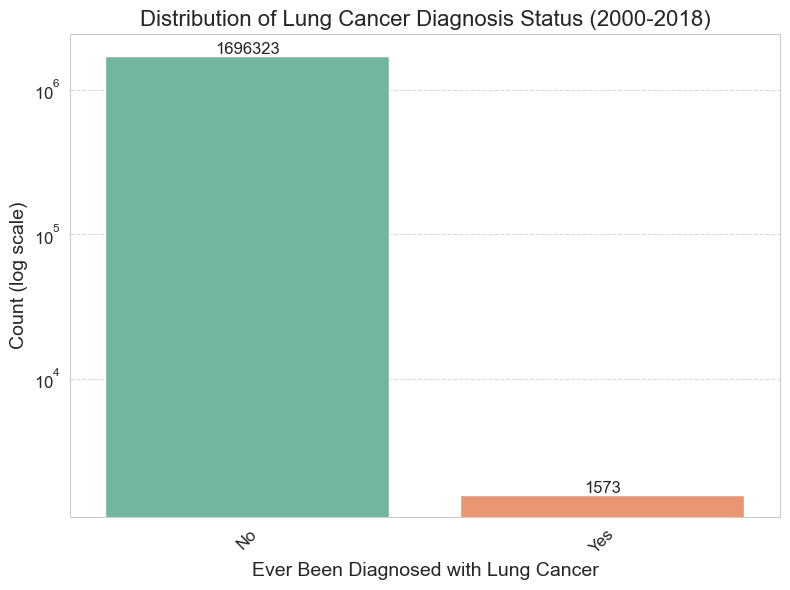

In [60]:
# Define label mapping
label_mapping = {
    1: "No",
    2: "Yes",
}

# Map labels to CNLUNG values
insurance["Diagnosis"] = insurance["CNLUNG"].map(label_mapping)

# Set style
sns.set_style("whitegrid")

# Plotting the distribution of 'CNLUNG'
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=insurance, x="Diagnosis", palette="Set2")
plt.yscale("log")  # Set y-axis scale to logarithmic
plt.title("Distribution of Lung Cancer Diagnosis Status (2000-2018)", fontsize=16)
plt.xlabel("Ever Been Diagnosed with Lung Cancer", fontsize=14)
plt.ylabel("Count (log scale)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Annotate counts on the bars
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ".0f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 5),
        textcoords="offset points",
        fontsize=12,
    )

plt.tight_layout()
plt.show()

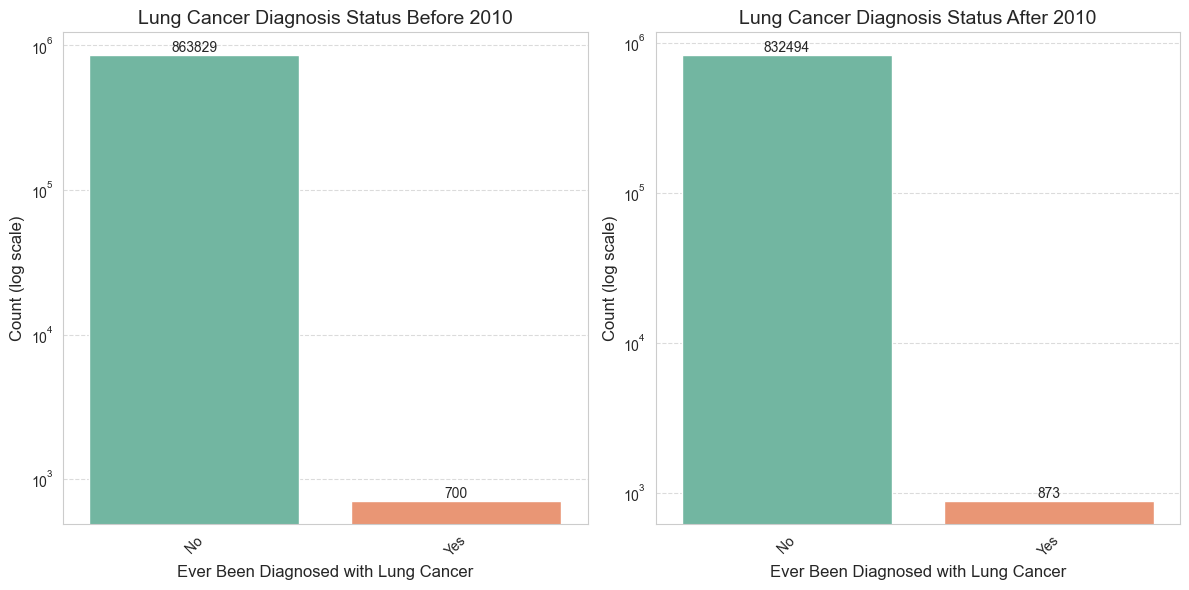

In [61]:
# Define label mapping
label_mapping = {
    1: "No",
    2: "Yes",
}

# Map labels to CNLUNG values
insurance["Diagnosis"] = insurance["CNLUNG"].map(label_mapping)

# Split the data into two groups based on year
insurance_before_2010 = insurance[insurance["YEAR"] < 2010]
insurance_after_2010 = insurance[insurance["YEAR"] >= 2010]

# Set style
sns.set_style("whitegrid")

# Plotting the distribution of 'CNLUNG' before 2010
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
ax1 = sns.countplot(data=insurance_before_2010, x="Diagnosis", palette="Set2")
plt.yscale("log")  # Set y-axis scale to logarithmic
plt.title("Lung Cancer Diagnosis Status Before 2010", fontsize=14)
plt.xlabel("Ever Been Diagnosed with Lung Cancer", fontsize=12)
plt.ylabel("Count (log scale)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Annotate counts on the bars
for p in ax1.patches:
    ax1.annotate(
        format(p.get_height(), ".0f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 5),
        textcoords="offset points",
        fontsize=10,
    )

# Plotting the distribution of 'CNLUNG' after 2010
plt.subplot(1, 2, 2)
ax2 = sns.countplot(data=insurance_after_2010, x="Diagnosis", palette="Set2")
plt.yscale("log")  # Set y-axis scale to logarithmic
plt.title("Lung Cancer Diagnosis Status After 2010", fontsize=14)
plt.xlabel("Ever Been Diagnosed with Lung Cancer", fontsize=12)
plt.ylabel("Count (log scale)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Annotate counts on the bars
for p in ax2.patches:
    ax2.annotate(
        format(p.get_height(), ".0f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 5),
        textcoords="offset points",
        fontsize=10,
    )

plt.tight_layout()
plt.show()

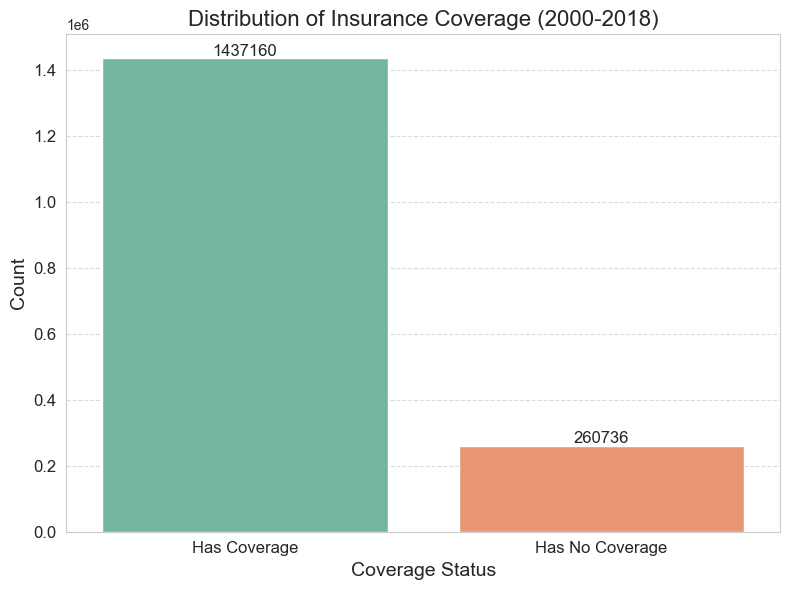

In [62]:
# Define label mapping
label_mapping = {1.0: "Has Coverage", 2.0: "Has No Coverage"}

# Map labels to HINOTCOVE values
insurance["HINOTCOVE_label"] = insurance["HINOTCOVE"].map(label_mapping)

# Set style
sns.set_style("whitegrid")

# Plotting the distribution of 'HINOTCOVE'
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=insurance, x="HINOTCOVE_label", palette="Set2")

# Customize plot aesthetics
plt.title("Distribution of Insurance Coverage (2000-2018)", fontsize=16)
plt.xlabel("Coverage Status", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Annotate counts on the bars with lower height
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ".0f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 5),  # Lower the height of the annotation
        textcoords="offset points",
        fontsize=12,
    )

plt.tight_layout()
plt.show()

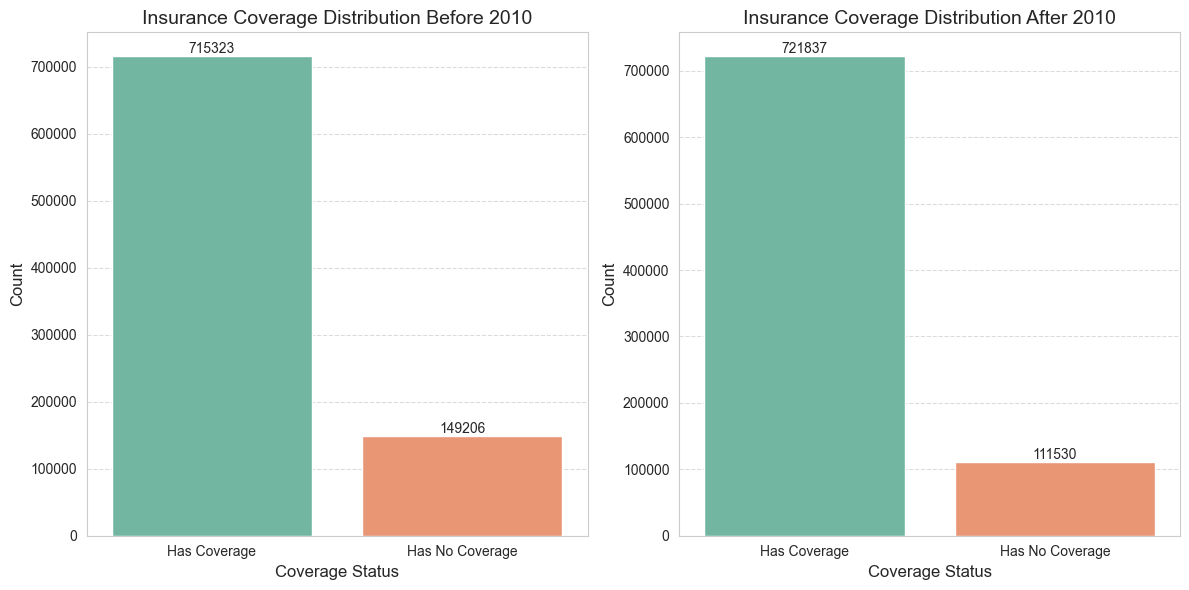

In [63]:
# Define label mapping
label_mapping = {1.0: "Has Coverage", 2.0: "Has No Coverage"}

# Map labels to HINOTCOVE values
insurance["HINOTCOVE_label"] = insurance["HINOTCOVE"].map(label_mapping)

# Split the data into two groups based on year
insurance_before_2010 = insurance[insurance["YEAR"] < 2010]
insurance_after_2010 = insurance[insurance["YEAR"] >= 2010]

# Set style
sns.set_style("whitegrid")

# Plotting the distribution of 'HINOTCOVE' before 2010
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
ax1 = sns.countplot(data=insurance_before_2010, x="HINOTCOVE_label", palette="Set2")
plt.title("Insurance Coverage Distribution Before 2010", fontsize=14)
plt.xlabel("Coverage Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Annotate counts on the bars
for p in ax1.patches:
    ax1.annotate(
        format(p.get_height(), ".0f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 5),  # Lower the height of the annotation
        textcoords="offset points",
        fontsize=10,
    )

# Plotting the distribution of 'HINOTCOVE' after 2010
plt.subplot(1, 2, 2)
ax2 = sns.countplot(data=insurance_after_2010, x="HINOTCOVE_label", palette="Set2")
plt.title("Insurance Coverage Distribution After 2010", fontsize=14)
plt.xlabel("Coverage Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Annotate counts on the bars
for p in ax2.patches:
    ax2.annotate(
        format(p.get_height(), ".0f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 5),  # Lower the height of the annotation
        textcoords="offset points",
        fontsize=10,
    )

plt.tight_layout()
plt.show()

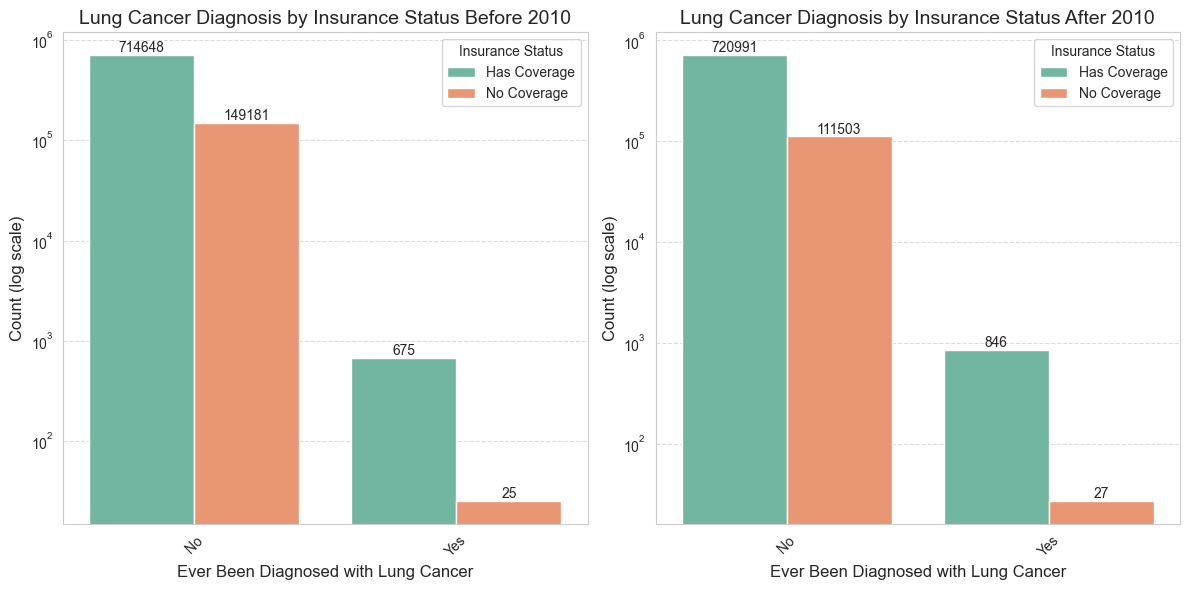

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'insurance' is your DataFrame with relevant data

# Define label mappings for diagnosis and insurance status
diagnosis_mapping = {
    1: "No",
    2: "Yes",
}
insurance_mapping = {1.0: "Has Coverage", 2.0: "No Coverage"}

# Map labels to CNLUNG values for diagnosis
insurance["Diagnosis"] = insurance["CNLUNG"].map(diagnosis_mapping)
# Map labels to HINOTCOVE values for insurance status
insurance["Insurance Status"] = insurance["HINOTCOVE"].map(insurance_mapping)

# Split the data into two groups based on year
insurance_before_2010 = insurance[insurance["YEAR"] < 2010]
insurance_after_2010 = insurance[insurance["YEAR"] >= 2010]

# Set style
sns.set_style("whitegrid")

# Plotting the distribution of 'Diagnosis' by 'Insurance Status' before 2010
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
ax1 = sns.countplot(
    data=insurance_before_2010, x="Diagnosis", hue="Insurance Status", palette="Set2"
)
plt.yscale("log")  # Set y-axis scale to logarithmic
plt.title("Lung Cancer Diagnosis by Insurance Status Before 2010", fontsize=14)
plt.xlabel("Ever Been Diagnosed with Lung Cancer", fontsize=12)
plt.ylabel("Count (log scale)", fontsize=12)
plt.legend(title="Insurance Status")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Annotate counts on the bars
for p in ax1.patches:
    ax1.annotate(
        format(p.get_height(), ".0f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 5),
        textcoords="offset points",
        fontsize=10,
    )

# Plotting the distribution of 'Diagnosis' by 'Insurance Status' after 2010
plt.subplot(1, 2, 2)
ax2 = sns.countplot(
    data=insurance_after_2010, x="Diagnosis", hue="Insurance Status", palette="Set2"
)
plt.yscale("log")  # Set y-axis scale to logarithmic
plt.title("Lung Cancer Diagnosis by Insurance Status After 2010", fontsize=14)
plt.xlabel("Ever Been Diagnosed with Lung Cancer", fontsize=12)
plt.ylabel("Count (log scale)", fontsize=12)
plt.legend(title="Insurance Status")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Annotate counts on the bars
for p in ax2.patches:
    ax2.annotate(
        format(p.get_height(), ".0f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 5),
        textcoords="offset points",
        fontsize=10,
    )

plt.tight_layout()
plt.show()

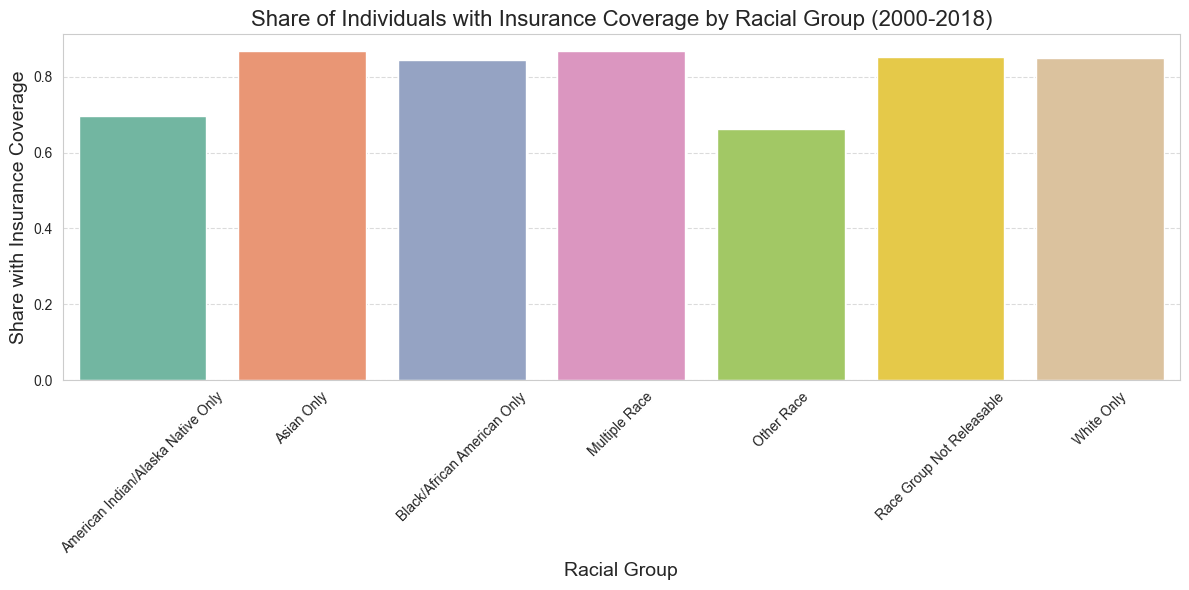

In [65]:
# Define racial group mapping
race_mapping = {
    100: "White Only",
    200: "Black/African American Only",
    300: "American Indian/Alaska Native Only",
    400: "Asian Only",
    520: "Other Race",
    530: "Race Group Not Releasable",
    541: "Multiple Race",
}

# Define insurance coverage mapping
insurance_mapping = {1.0: "Has Coverage", 2.0: "No Coverage"}

# Map racial groups and insurance status
insurance["Racial Group"] = insurance["RACENEW"].map(race_mapping)
insurance["Insurance Status"] = insurance["HINOTCOVE"].map(insurance_mapping)

# Group by Racial Group and Insurance Status, and count the number of entries
insurance_grouped = (
    insurance.groupby(["Racial Group", "Insurance Status"]).size().unstack(fill_value=0)
)

# Calculate the share of people with insurance coverage within each racial group
insurance_grouped["Total"] = insurance_grouped.sum(axis=1)
insurance_grouped["Share with Coverage"] = (
    insurance_grouped["Has Coverage"] / insurance_grouped["Total"]
)

# Plotting the results
plt.figure(figsize=(12, 6))
sns.barplot(
    x=insurance_grouped.index,
    y=insurance_grouped["Share with Coverage"],
    palette="Set2",
)
plt.title(
    "Share of Individuals with Insurance Coverage by Racial Group (2000-2018)",
    fontsize=16,
)
plt.xlabel("Racial Group", fontsize=14)
plt.ylabel("Share with Insurance Coverage", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

In [66]:
# Mapping and grouping as previously defined
race_mapping = {
    100: "White Only",
    200: "Black/African American Only",
    300: "American Indian/Alaska Native Only",
    400: "Asian Only",
    520: "Other Race",
    530: "Race Group Not Releasable",
    541: "Multiple Race",
}

insurance_mapping = {1.0: "Has Coverage", 2.0: "No Coverage"}

insurance["Racial Group"] = insurance["RACENEW"].map(race_mapping)
insurance["Insurance Status"] = insurance["HINOTCOVE"].map(insurance_mapping)

# Creating the contingency table
contingency_table = pd.crosstab(
    insurance["Racial Group"], insurance["Insurance Status"]
)

# Performing the chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared Test Statistic:", chi2)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print(
    "\nExpected Frequencies:\n",
    pd.DataFrame(
        expected, index=contingency_table.index, columns=contingency_table.columns
    ),
)

# Deciding whether to reject the null hypothesis
if p_value < 0.05:
    print(
        "The differences in insurance coverage across racial groups are statistically significant."
    )
else:
    print(
        "There is no significant difference in insurance coverage across racial groups."
    )

Chi-squared Test Statistic: 7829.5903899049545
P-value: 0.0
Degrees of Freedom: 6

Expected Frequencies:
 Insurance Status                    Has Coverage    No Coverage
Racial Group                                                   
American Indian/Alaska Native Only  1.488627e+04    2700.733162
Asian Only                          8.104369e+04   14703.309150
Black/African American Only         2.048646e+05   37167.444621
Multiple Race                       3.155428e+04    5724.718913
Other Race                          1.390694e+04    2523.059410
Race Group Not Releasable           2.914279e+03     528.721458
White Only                          1.087990e+06  197388.013287
The differences in insurance coverage across racial groups are statistically significant.


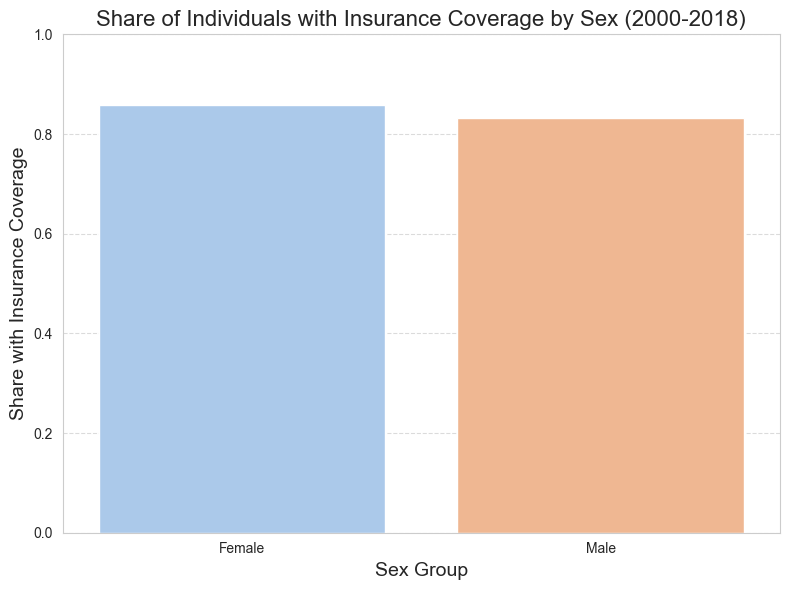

In [67]:
# Define sex group mapping
sex_mapping = {1: "Male", 2: "Female"}

# Define insurance coverage mapping (as previously defined)
insurance_mapping = {1.0: "Has Coverage", 2.0: "No Coverage"}

# Map sex groups and insurance status
insurance["Sex Group"] = insurance["SEX"].map(sex_mapping)
insurance["Insurance Status"] = insurance["HINOTCOVE"].map(insurance_mapping)

# Group by Sex Group and Insurance Status, and count the number of entries
insurance_grouped = (
    insurance.groupby(["Sex Group", "Insurance Status"]).size().unstack(fill_value=0)
)

# Calculate the share of people with insurance coverage within each sex group
insurance_grouped["Total"] = insurance_grouped.sum(axis=1)
insurance_grouped["Share with Coverage"] = (
    insurance_grouped["Has Coverage"] / insurance_grouped["Total"]
)

# Plotting the results
plt.figure(figsize=(8, 6))
sns.barplot(
    x=insurance_grouped.index,
    y=insurance_grouped["Share with Coverage"],
    palette="pastel",
)
plt.title(
    "Share of Individuals with Insurance Coverage by Sex (2000-2018)", fontsize=16
)
plt.xlabel("Sex Group", fontsize=14)
plt.ylabel("Share with Insurance Coverage", fontsize=14)
plt.ylim(0, 1)  # Set y-axis limits to show proportions from 0 to 1
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

In [68]:
import pandas as pd
from scipy.stats import chi2_contingency

# Mapping for sex and insurance status as previously defined
sex_mapping = {1: "Male", 2: "Female"}
insurance_mapping = {1.0: "Has Coverage", 2.0: "No Coverage"}

insurance["Sex Group"] = insurance["SEX"].map(sex_mapping)
insurance["Insurance Status"] = insurance["HINOTCOVE"].map(insurance_mapping)

# Creating the contingency table
contingency_table_sex = pd.crosstab(
    insurance["Sex Group"], insurance["Insurance Status"]
)

# Performing the chi-squared test
chi2_value, p_value, dof, expected = chi2_contingency(contingency_table_sex)

print("Chi-squared Test Statistic:", chi2_value)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print(
    "\nExpected Frequencies:\n",
    pd.DataFrame(
        expected,
        index=contingency_table_sex.index,
        columns=contingency_table_sex.columns,
    ),
)

# Deciding whether to reject the null hypothesis
if p_value < 0.05:
    print(
        "The differences in insurance coverage between sex groups are statistically significant."
    )
else:
    print(
        "There is no significant difference in insurance coverage between sex groups."
    )

Chi-squared Test Statistic: 2289.9133329113206
P-value: 0.0
Degrees of Freedom: 1

Expected Frequencies:
 Insurance Status   Has Coverage    No Coverage
Sex Group                                     
Female            738667.614978  134012.385022
Male              698492.385022  126723.614978
The differences in insurance coverage between sex groups are statistically significant.


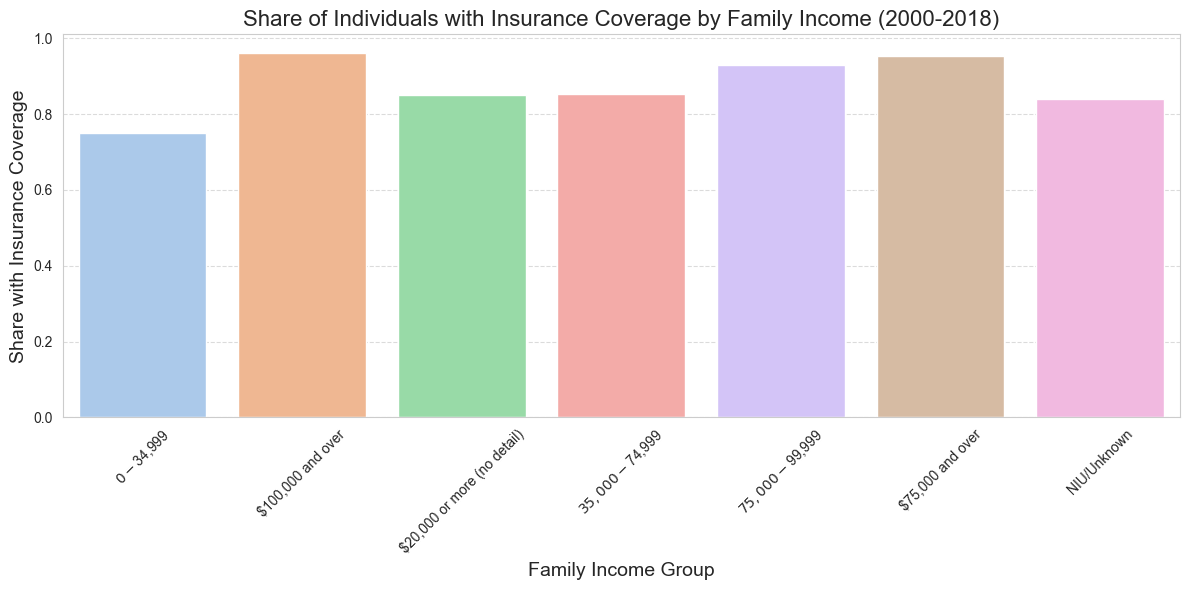

In [69]:
income_mapping = {
    10.0: "$0 - $34,999",
    20.0: "$35,000 - $74,999",
    30.0: "$75,000 and over",
    31.0: "$75,000 - $99,999",
    32.0: "$100,000 and over",
    96.0: "$20,000 or more (no detail)",
    0.0: "NIU/Unknown",
}

insurance["Income Group"] = insurance["INCFAM97ON2"].map(income_mapping)
insurance["Insurance Status"] = insurance["HINOTCOVE"].map(insurance_mapping)
grouped_income = (
    insurance.groupby(["Income Group", "Insurance Status"]).size().unstack(fill_value=0)
)
grouped_income["Total"] = grouped_income.sum(axis=1)
grouped_income["Share with Coverage"] = (
    grouped_income["Has Coverage"] / grouped_income["Total"]
)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=grouped_income.index, y=grouped_income["Share with Coverage"], palette="pastel"
)
plt.title(
    "Share of Individuals with Insurance Coverage by Family Income (2000-2018)",
    fontsize=16,
)
plt.xlabel("Family Income Group", fontsize=14)
plt.ylabel("Share with Insurance Coverage", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

In [70]:
contingency_table_income = pd.crosstab(
    insurance["Income Group"], insurance["Insurance Status"]
)

chi2, p_value, dof, expected = chi2_contingency(contingency_table_income)
print("Chi-squared Test Statistic:", chi2)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print(
    "\nExpected Frequencies:\n",
    pd.DataFrame(
        expected,
        index=contingency_table_income.index,
        columns=contingency_table_income.columns,
    ),
)

if p_value < 0.05:
    print(
        "The differences in insurance coverage across family income groups are statistically significant."
    )
else:
    print(
        "There is no significant difference in insurance coverage across family income groups."
    )

Chi-squared Test Statistic: 76105.12632191449
P-value: 0.0
Degrees of Freedom: 6

Expected Frequencies:
 Insurance Status              Has Coverage   No Coverage
Income Group                                            
$0 - $34,999                 439730.182108  79777.817892
$100,000 and over            186038.976215  33752.023785
$20,000 or more (no detail)   82293.030127  14929.969873
$35,000 - $74,999            386199.041284  70065.958716
$75,000 - $99,999             97472.163760  17683.836240
$75,000 and over              97269.019163  17646.980837
NIU/Unknown                  148157.587343  26879.412657
The differences in insurance coverage across family income groups are statistically significant.


In [71]:
smoking_mapping = {
    1: "Yes",  # Smokers
    2: "No",  # Non-smokers
    0: "Others",  # Other statuses, such as unknown or unspecified
}

In [72]:
insurance["Smoking Status"] = insurance["SMK"].map(smoking_mapping)
insurance["Insurance Status"] = insurance["HINOTCOVE"].map(
    insurance_mapping
)  # Assuming the previous mapping for insurance

In [73]:
grouped_smoking = (
    insurance.groupby(["Smoking Status", "Insurance Status"])
    .size()
    .unstack(fill_value=0)
)
grouped_smoking["Total"] = grouped_smoking.sum(axis=1)
grouped_smoking["Share with Coverage"] = (
    grouped_smoking["Has Coverage"] / grouped_smoking["Total"]
)

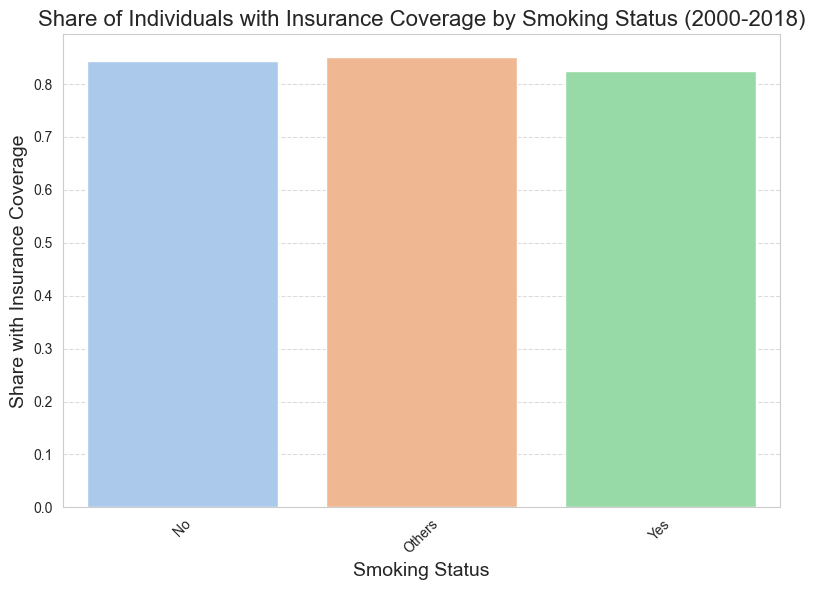

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(
    x=grouped_smoking.index, y=grouped_smoking["Share with Coverage"], palette="pastel"
)
plt.title(
    "Share of Individuals with Insurance Coverage by Smoking Status (2000-2018)",
    fontsize=16,
)
plt.xlabel("Smoking Status", fontsize=14)
plt.ylabel("Share with Insurance Coverage", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

In [75]:
from scipy.stats import chi2_contingency

contingency_table_smoking = pd.crosstab(
    insurance["Smoking Status"], insurance["Insurance Status"]
)

chi2, p_value, dof, expected = chi2_contingency(contingency_table_smoking)
print("Chi-squared Test Statistic:", chi2)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print(
    "\nExpected Frequencies:\n",
    pd.DataFrame(
        expected,
        index=contingency_table_smoking.index,
        columns=contingency_table_smoking.columns,
    ),
)

if p_value < 0.05:
    print(
        "The differences in insurance coverage across smoking status groups are statistically significant."
    )
else:
    print(
        "There is no significant difference in insurance coverage across smoking status groups."
    )

Chi-squared Test Statistic: 1033.0749089678588
P-value: 4.684182651435431e-225
Degrees of Freedom: 2

Expected Frequencies:
 Insurance Status   Has Coverage    No Coverage
Smoking Status                                
No                260329.802061   47230.197939
Others            997893.664724  181042.335276
Yes               178936.533215   32463.466785
The differences in insurance coverage across smoking status groups are statistically significant.


In [76]:
occupation_mapping = {
    0: "NIU/Unknown",
    1: "Office and Administrative Support Occupations",
    2: "Management Occupations",
    3: "Sales and Related Occupations",
    4: "Production Occupations",
    5: "Education, Training, and Library Occupations",
    6: "Transportation and Material Moving Occupations",
    7: "Healthcare Practitioners and Technical Occupations",
    8: "Business and Financial Operations Occupations",
    9: "Construction and Extraction Occupations",
    10: "Food Preparation and Serving Related Occupations",
    11: "Building and Grounds Cleaning and Maintenance Occupations",
    12: "Installation, Maintenance, and Repair Occupations",
    13: "Personal Care and Service Occupations",
    14: "Healthcare Support Occupations",
    15: "Architecture and Engineering Occupations",
    16: "Community and Social Service Occupations",
    17: "Protective Service Occupations",
    18: "Arts, Design, Entertainment, Sports, and Media Occupations",
    19: "Professional Specialty Occupations",
    20: "Administrative Support Occupations, Including Clerical",
    21: "Computer and Mathematical Occupations",
    22: "Executive, Administrative, and Managerial Occupations",
    23: "Legal Occupations",
    24: "Military",
    25: "Service Occupations",
    26: "Life, Physical, and Social Science Occupations",
    27: "Sales Occupations",
    28: "Farming, Fishing, and Forestry Occupations",
    29: "Precision Production, Craft, and Repair Occupations",
    30: "Operators, Fabricators, and Laborers",
    31: "Technicians and Related Support Occupations",
    32: "Farming, Forestry, and Fishing Occupations",
    33: "Handlers, Equipment Cleaners, Helpers, and Laborers",
}

In [77]:
insurance["Occupation Group"] = insurance["Occupation_Code"].map(occupation_mapping)
insurance["Insurance Status"] = insurance["HINOTCOVE"].map(insurance_mapping)

In [78]:
grouped_occupation = (
    insurance.groupby(["Occupation Group", "Insurance Status"])
    .size()
    .unstack(fill_value=0)
)
grouped_occupation["Total"] = grouped_occupation.sum(axis=1)
grouped_occupation["Share with Coverage"] = (
    grouped_occupation["Has Coverage"] / grouped_occupation["Total"]
)

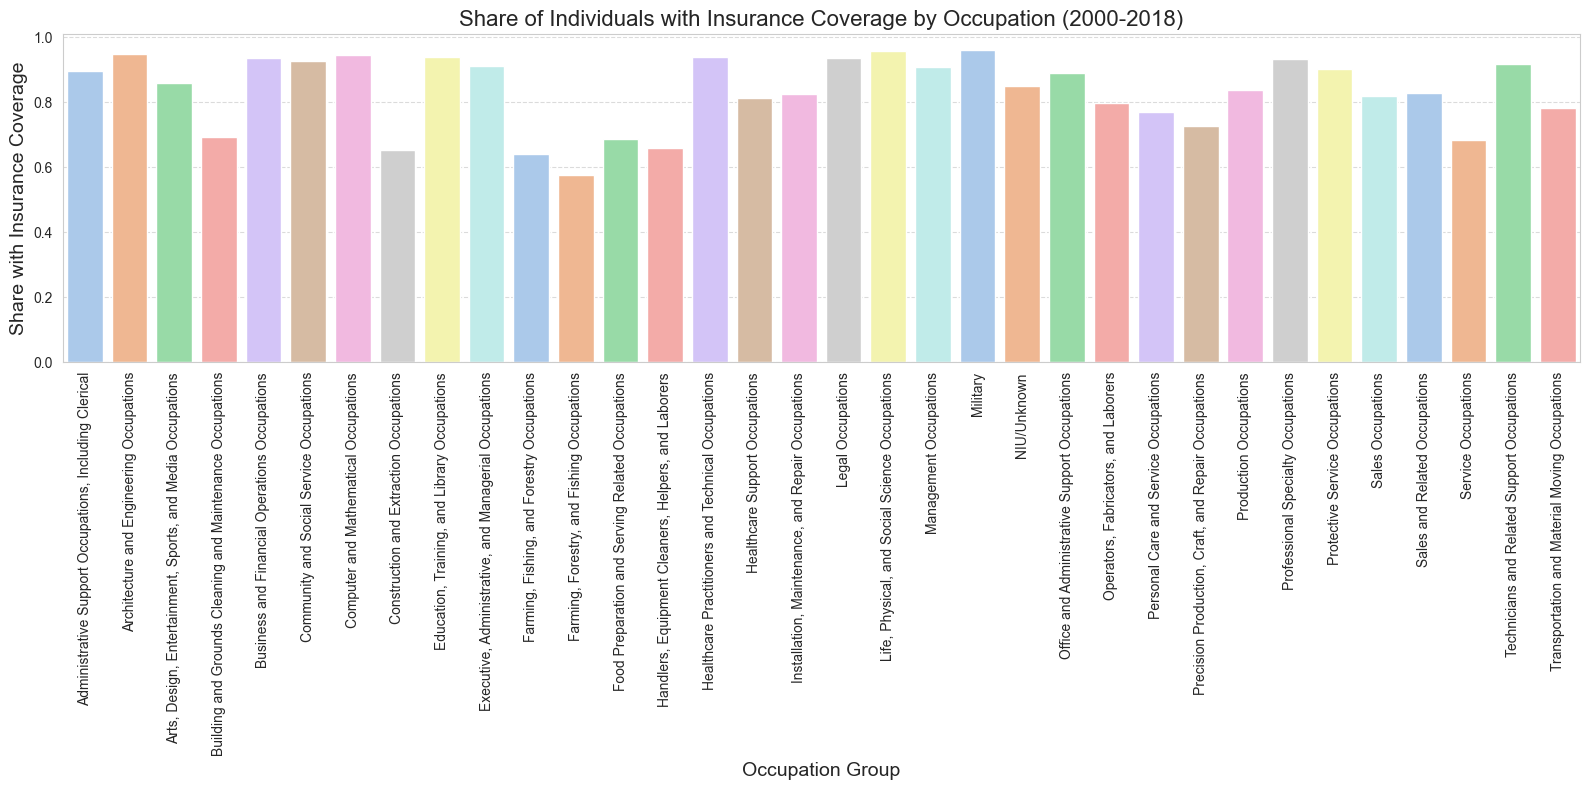

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 8))
sns.barplot(
    x=grouped_occupation.index,
    y=grouped_occupation["Share with Coverage"],
    palette="pastel",
)
plt.title(
    "Share of Individuals with Insurance Coverage by Occupation (2000-2018)",
    fontsize=16,
)
plt.xlabel("Occupation Group", fontsize=14)
plt.ylabel("Share with Insurance Coverage", fontsize=14)
plt.xticks(rotation=90)  # Rotate for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

In [80]:
from scipy.stats import chi2_contingency

contingency_table_occupation = pd.crosstab(
    insurance["Occupation Group"], insurance["Insurance Status"]
)

chi2, p_value, dof, expected = chi2_contingency(contingency_table_occupation)
print("Chi-squared Test Statistic:", chi2)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print(
    "\nExpected Frequencies:\n",
    pd.DataFrame(
        expected,
        index=contingency_table_occupation.index,
        columns=contingency_table_occupation.columns,
    ),
)

if p_value < 0.05:
    print(
        "The differences in insurance coverage across occupation groups are statistically significant."
    )
else:
    print(
        "There is no significant difference in insurance coverage across occupation groups."
    )

Chi-squared Test Statistic: 29789.142163118544
P-value: 0.0
Degrees of Freedom: 33

Expected Frequencies:
 Insurance Status                                    Has Coverage  \
Occupation Group                                                   
Administrative Support Occupations, Including C...  8.870647e+03   
Architecture and Engineering Occupations            5.502679e+03   
Arts, Design, Entertainment, Sports, and Media ...  5.869186e+03   
Building and Grounds Cleaning and Maintenance O...  1.482448e+04   
Business and Financial Operations Occupations       1.306474e+04   
Community and Social Service Occupations            5.349474e+03   
Computer and Mathematical Occupations               7.465564e+03   
Construction and Extraction Occupations             1.680090e+04   
Education, Training, and Library Occupations        1.994457e+04   
Executive, Administrative, and Managerial Occup...  8.628567e+03   
Farming, Fishing, and Forestry Occupations          3.074255e+03   
Farming, 